In [96]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

In [97]:
df = pd.read_csv("marketing_campaign.csv", index_col= "Unnamed: 0")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# preprocessing and feature engineering

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [99]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [100]:
# filling the missing values 
df["Income"].fillna(df["Income"].mean() , inplace=True) 

In [101]:
# converting the date into datetime 
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_19024\1254369815.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


In [102]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [103]:
# get the age from year_birth column
df["Age"] = 2023 - df["Year_Birth"]

In [104]:
# total amount spent by each customer
df["Total_Spent"] = df["MntWines"]+df["MntFishProducts"]+df["MntFruits"]+df["MntGoldProds"]+df["MntSweetProducts"]+df["MntMeatProducts"]

In [105]:
# no. of children in each family
df["Children"]= df["Kidhome"]+df["Teenhome"]

In [106]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [107]:
# total family size of each customer
for i in range(len(df)):
    if df.iloc[i, 3] in ['Together', 'Married']:
        df.loc[i, "Family_size"] = 2 + df.loc[i, "Children"]
    else:
        df.loc[i, "Family_size"] = 1 + df.loc[i, "Children"]

In [108]:
# if the customer is single of with someone
for i in range(len(df)):
    if df.iloc[i, 3] in ['Together', 'Married']:
        df.loc[i, "Living_With"] = "Partner" 
    else:
        df.loc[i, "Living_With"] = "Alone" 

In [109]:
# if customer has kids or not 
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [110]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                                         "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [111]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                      "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [112]:
# drop the redundant variables 
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"],axis = 1)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [114]:
#Label Encoding the object dtypes.
LE=LabelEncoder()

In [115]:
df["Education"] = LE.fit_transform(df["Education"])
df["Living_With"] = LE.fit_transform(df["Living_With"])

In [116]:
# removing some inconsistent data
df = df[(df["Age"]<90)]
df = df[(df["Income"]<300000)]

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int32  
 1   Income               2236 non-null   float64
 2   Kidhome              2236 non-null   int64  
 3   Teenhome             2236 non-null   int64  
 4   Recency              2236 non-null   int64  
 5   Wines                2236 non-null   int64  
 6   Fruits               2236 non-null   int64  
 7   Meat                 2236 non-null   int64  
 8   Fish                 2236 non-null   int64  
 9   Sweets               2236 non-null   int64  
 10  Gold                 2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   i

### scaling



In [118]:
df1 = df.copy()

In [119]:
df1 = df1.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2', 'Complain', 'Response'], axis = 1)

In [120]:
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [121]:
df1_scaled = pd.DataFrame(scaler.transform(df1), columns = df1.columns) 

In [122]:
df1_scaled

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_Spent,Children,Family_size,Living_With,Is_Parent
0,-0.89438,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,...,1.407639,2.509801,-0.552429,0.692865,1.016868,1.680176,-1.264308,-1.758810,-1.347635,-1.584362
1,-0.89438,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,...,-1.110921,-0.568970,-1.167738,-0.131421,1.273264,-0.962202,1.395139,0.445618,-1.347635,0.631169
2,-0.89438,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,...,1.407639,-0.226884,1.293496,-0.543564,0.333146,0.282541,-1.264308,-0.656596,0.742041,-1.584362
3,-0.89438,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,...,-0.751127,-0.911056,-0.552429,0.280722,-1.290693,-0.918994,0.065416,0.445618,0.742041,0.631169
4,0.57070,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,...,0.328256,0.115201,0.062879,-0.131421,-1.034298,-0.305762,0.065416,0.445618,0.742041,0.631169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.89438,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,2.201960,...,1.767433,0.115201,-0.552429,-0.131421,0.162216,1.221499,0.065416,0.445618,0.742041,0.631169
2232,0.57070,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,...,1.407639,-0.226884,-0.244775,0.692865,1.956986,-0.269201,2.724862,2.650045,0.742041,0.631169
2233,-0.89438,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,-0.365231,...,-0.751127,0.115201,2.216459,0.280722,-1.034298,1.055312,-1.264308,-1.758810,-1.347635,-1.584362
2234,0.57070,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,0.070707,...,0.688050,0.799373,1.293496,-0.955707,1.102333,0.393886,0.065416,0.445618,0.742041,0.631169


# Dimensionality reduction

In [123]:
pca = PCA(n_components=3)
pca.fit(df1_scaled)
PCA_data = pd.DataFrame(pca.transform(df1_scaled), columns=(["col1","col2", "col3"]))

In [124]:
PCA_df1 = PCA_data.copy()
PCA_df1 

,col1,col2,col3
0,4.934310,-0.392672,1.154450
1,-2.824374,0.213960,0.779619
2,2.631518,-0.693384,-0.126576
3,-2.607812,-1.345150,-1.145200
4,-0.617825,0.282924,-1.272792
...,...,...,...
2231,2.303840,2.423393,-0.156258
2232,-3.053686,4.242290,-0.700733
2233,2.714493,-1.786729,1.377212
2234,1.520858,1.840593,-0.198136


In [125]:
df2 = PCA_data.copy()

In [126]:
df3 = PCA_data.copy()

# Apply different clustering techniques

### K-means

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_k

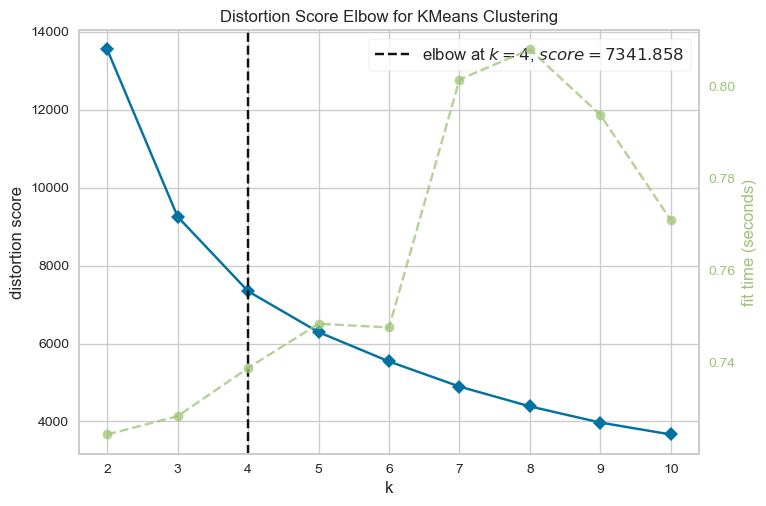

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [127]:
# deciding number of clusters using elbow method
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df1)
Elbow_M.show()

In [128]:
# K-means model buliding
kmeans = KMeans(n_clusters=4, random_state=42)

In [129]:
# assinging the clusters to each observation
cluster_assignments = kmeans.fit_predict(PCA_df1)
PCA_df1["Clusters"] = cluster_assignments

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [130]:
PCA_df1

,col1,col2,col3,Clusters
0,4.934310,-0.392672,1.154450,0
1,-2.824374,0.213960,0.779619,3
2,2.631518,-0.693384,-0.126576,0
3,-2.607812,-1.345150,-1.145200,1
4,-0.617825,0.282924,-1.272792,3
...,...,...,...,...
2231,2.303840,2.423393,-0.156258,2
2232,-3.053686,4.242290,-0.700733,3
2233,2.714493,-1.786729,1.377212,0
2234,1.520858,1.840593,-0.198136,2


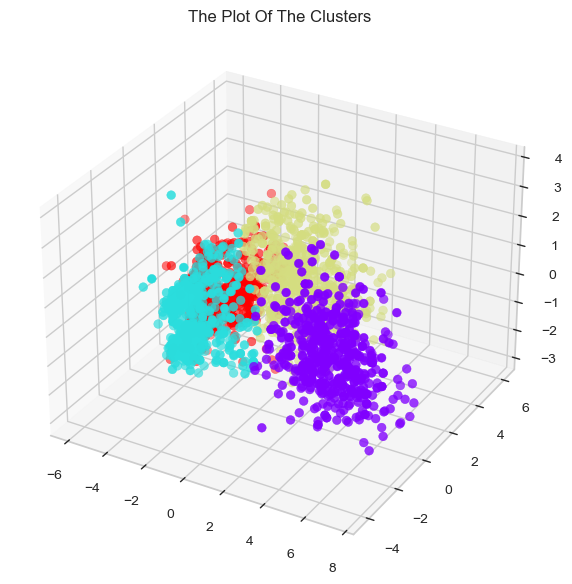

In [131]:
# plotting the clusters
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA_df1["col1"],PCA_df1["col2"], PCA_df1["col3"], s=40, c=PCA_df1["Clusters"], marker='o',cmap='rainbow')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [132]:
# Silhouette score for evaluation
silhouette_avg = silhouette_score(PCA_df1, cluster_assignments)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4405676782808866


In [133]:
# we can also get the number of clusters using the silhouette score 
sil_score = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(PCA_df1)
    score = silhouette_score(PCA_df1,kmeans.labels_)
    sil_score.append(score)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_k

In [134]:
sil_score

[0.441527920600299,
 0.41557207750752007,
 0.4405676782808866,
 0.4227059915431095,
 0.3891761041797144,
 0.34926338243596294,
 0.3599218010235663,
 0.37157330807221123,
 0.3851707584275907]

### hierarchical clustering

In [ ]:
# Compute the linkage matrix for dendogram creation
linkage_matrix = linkage(df2, method='ward')  # You can choose a different linkage method


plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')

plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
sil_score1 = []
for k in range(2,11):
    ac = AgglomerativeClustering(n_clusters=k)
    ac.fit(df2)
    score1 = silhouette_score(df2,ac.labels_)
    sil_score1.append(score1)

In [ ]:
sil_score1  # 3 clusters should be made 

In [ ]:
# creating Agglomerative HC model
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model to your data and get cluster assignments
cluster_assignments = agg_clustering.fit_predict(PCA_df1)

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA_df1["col1"],PCA_df1["col2"], PCA_df1["col3"], s=40, c=cluster_assignments, marker='o',cmap='rainbow')
ax.set_title("The Plot Of The Clusters")
plt.show()

## 

### DBSCAN

In [ ]:
results = []

for k in range(4,6):
    for eps in np.arange(0.1,2 , 0.01):
        dbscan1 = DBSCAN(eps=eps, min_samples=k)
        dbscan1.fit(df3)
        unique_labels = len(np.unique(dbscan1.labels_))
        
        if unique_labels > 1:
            score2 = silhouette_score(df3, dbscan1.labels_)
            results.append((score2, k, eps))

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['sil_score2', 'k', 'eps'])

In [ ]:
max(results_df["sil_score2"])

In [ ]:
results_df[results_df["sil_score2"]== 0.32750284229365584]

In [ ]:
# making the model
dbscan = DBSCAN(eps=1.85, min_samples=10)

# Fit the model to your data
cluster_assignments1 = dbscan.fit_predict(df3)
cluster_assignments1

In [ ]:
score3 = silhouette_score(df3, dbscan.labels_)
score3  # we can see that the silhouette score is not decresed much 

In [ ]:
df3["cluster"] = cluster_assignments1

In [ ]:
df3["cluster"].unique()

In [ ]:
df3["cluster"].value_counts()

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(x=df3["col1"], y=df3["col2"], z=df3["col3"],
                    title="The Plot Of The Clusters",color=cluster_assignments1,
                    color_continuous_scale='Rainbow',
                    labels={'x': 'col1', 'y': 'col2', 'z': "col3"})

fig.update_traces(marker=dict(size=5))

# Show the plot
fig.show()